## **Loading Dataset**

In [ ]:
import numpy as np
import pandas as pd

rd = pd.read_csv('UpdatedResumeDataSet.csv')
rd.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
rd['cleaned_resume'] = ''
rd.Category.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [ ]:
rd.Category.nunique()

25

In [ ]:
print(rd.Category.value_counts())

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Mechanical Engineer          40
Blockchain                   40
Data Science                 40
Operations Manager           40
Sales                        40
ETL Developer                40
Arts                         36
Database                     33
PMO                          30
Electrical Engineering       30
Health and fitness           30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64


## **Visulizing Category Count**

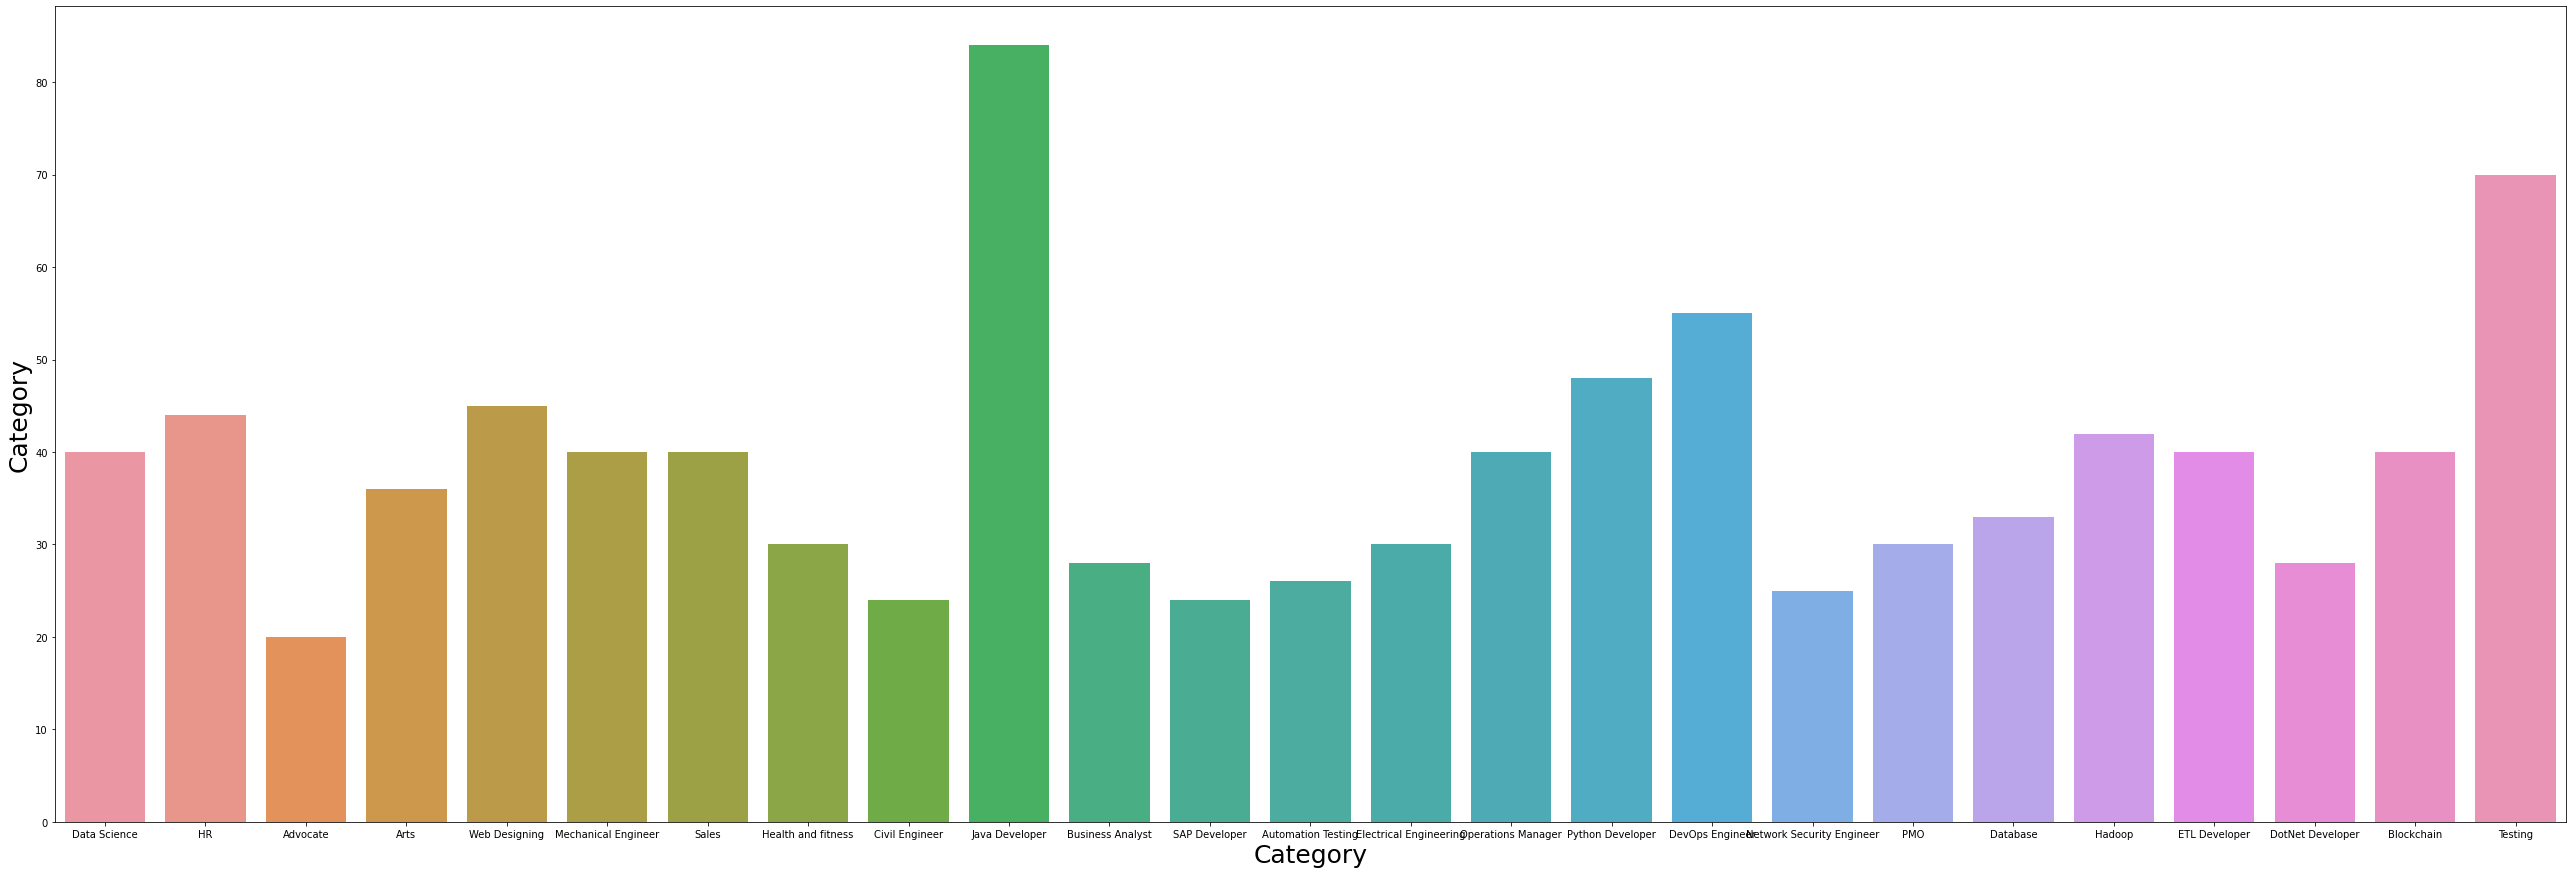

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(45,15))
sns.countplot(x='Category',data=rd)
plt.xlabel(xlabel='Category',fontsize=25)
plt.ylabel(ylabel='Category',fontsize=25)
plt.show()

## **Text Cleaning**

In [ ]:
import re
def cleanResume(rText):
    
    rText = re.sub('http\S+\s*', ' ', rText)  
    rText = re.sub('RT|cc', ' ', rText)  
    rText = re.sub('#\S+', '', rText)  
    rText = re.sub('@\S+', '  ', rText)  
    rText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', rText) 
    rText = re.sub(r'[^\x00-\x7f]',r' ', rText) 
    rText = re.sub('\s+', ' ', rText)  
    rText=rText.lower()
    return rText
    
rd['cleaned_resume'] = rd.Resume.apply(lambda x: cleanResume(x))
rd

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 to may 2017 b e uit...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skills proficient in ms office word b...
958,Testing,â Willingness to accept the challenges. â ...,willingness to a ept the challenges positive ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skills quick learner eagerness to lea...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills software knowledge ms power po...


## **Generating a WordCloud**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = rd['Resume'].values
cleanedSentences = ""
for i in range(0,962):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
mostcommon

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('exprience', 3829),
 ('company', 3578),
 ('project', 3498),
 ('months', 3288),
 ('description', 3122),
 ('details', 3096),
 ('data', 2156),
 ('1', 2134),
 ('management', 1999),
 ('team', 1950),
 ('6', 1499),
 ('maharashtra', 1449),
 ('system', 1425),
 ('testing', 1349),
 ('year', 1336),
 ('database', 1280),
 ('development', 1203),
 ('business', 1196),
 ('ltd', 1177),
 ('test', 1174),
 ('less', 1145),
 ('using', 1124),
 ('sql', 1120),
 ('skill', 1117),
 ('january', 1090),
 ('client', 1085),
 ('java', 1076),
 ('developer', 1069),
 ('engineering', 1055),
 ('application', 1046),
 ('pune', 1026),
 ('work', 987),
 ('services', 956),
 ('skills', 950),
 ('c', 939),
 ('software', 887),
 ('pvt', 879),
 ('education', 857),
 ('responsibilities', 856),
 ('sales', 825),
 ('reports', 814),
 ('process', 813),
 ('operations', 791),
 ('requirements', 790),
 ('customer', 775),
 ('server', 773),
 ('technical', 767),
 ('technologies', 764),
 ('india', 762),
 ('university', 762)]

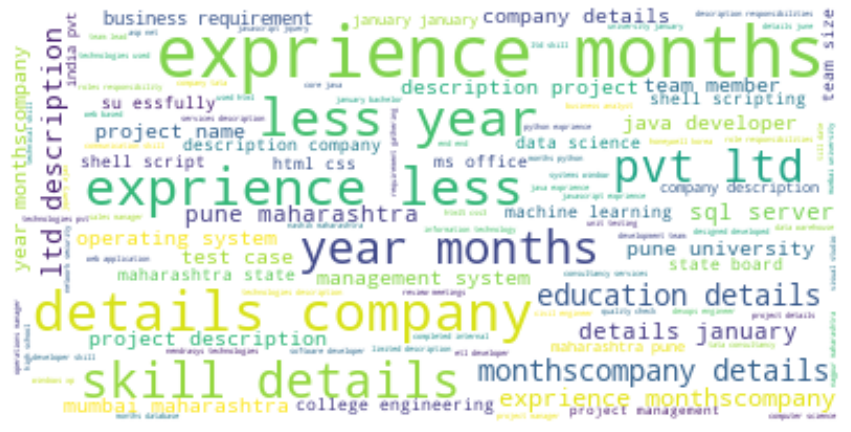

In [ ]:
wc = WordCloud(background_color='white').generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Text Processing**
Converting words into categorical values and word vectorization using TfidVectorizer

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
vary_cat = ['Category']
led = LabelEncoder()

for i in vary_cat:
    rd[i] = led.fit_transform(rd[i])

reqText = rd['cleaned_resume'].values
reqTarget = rd['Category'].values

word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english', max_features=2000)
word_vectorizer.fit(reqText)
WordFeatures = word_vectorizer.transform(reqText)

## **Training Machine Learning Model**

First we will split the data into training and test data. I will use the One vs the Rest Classifier, KNeighborsClassifier for training my model for resume screening. 

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,reqTarget,random_state=0, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(673, 2000)
(289, 2000)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform'),
                    n_jobs=None)

## **Accuracy & Classification Report**

In [ ]:
pred = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training data')
print(clf.score(X_train, y_train))
print('\nAccuracy of KNeighbors Classifier on test data')
print(clf.score(X_test, y_test))

print("\nClassification report")
print(metrics.classification_report(y_test, pred))

Accuracy of KNeighbors Classifier on training data
0.9955423476968797

Accuracy of KNeighbors Classifier on test data
0.9896193771626297

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      0.88      0.93         8
           3       1.00      1.00      1.00        15
           4       0.91      1.00      0.95        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        10
           8       1.00      0.87      0.93        15
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        11
          11       0.93      1.00      0.96        13
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        13
          14       1.00      